Google Colab上執行  
使用Lena，放在google colab的sample_data目錄下後再進行存取  
SourceCode@Google Colab: https://colab.research.google.com/drive/14dbS5joM7x4Yjp3evl4dyUBnhSSP14Su

In [0]:
# _*_ coding: utf-8 _*_
# _*_ coding: cp950 _*_

# author: Chi-Hsu Chen (css920@gmail.com)
# datetime: 20200530

import numpy as np
import cv2
import urllib
from google.colab.patches import cv2_imshow

讀取原始檔案

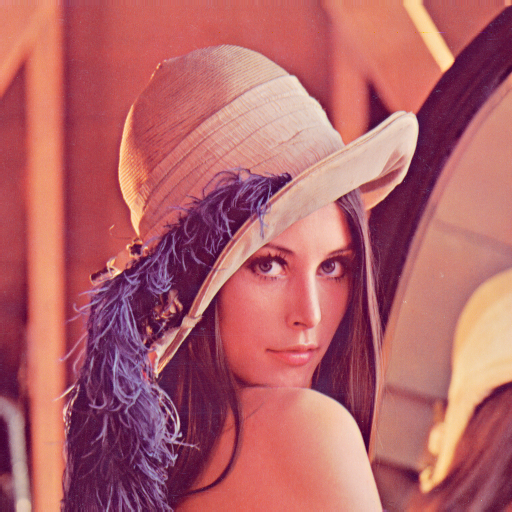

In [53]:
# 讀取原始檔案
imgLenaColor=cv2.imread('sample_data/lena.png',cv2.IMREAD_COLOR)
cv2_imshow(imgLenaColor)

#改變飽和度
轉換成 HLS color space, 改變 s channel 的值

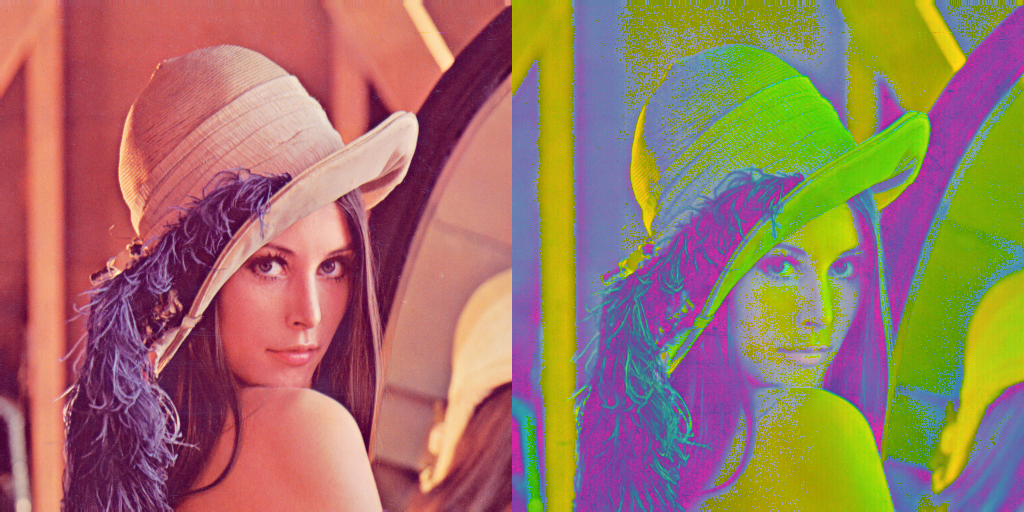

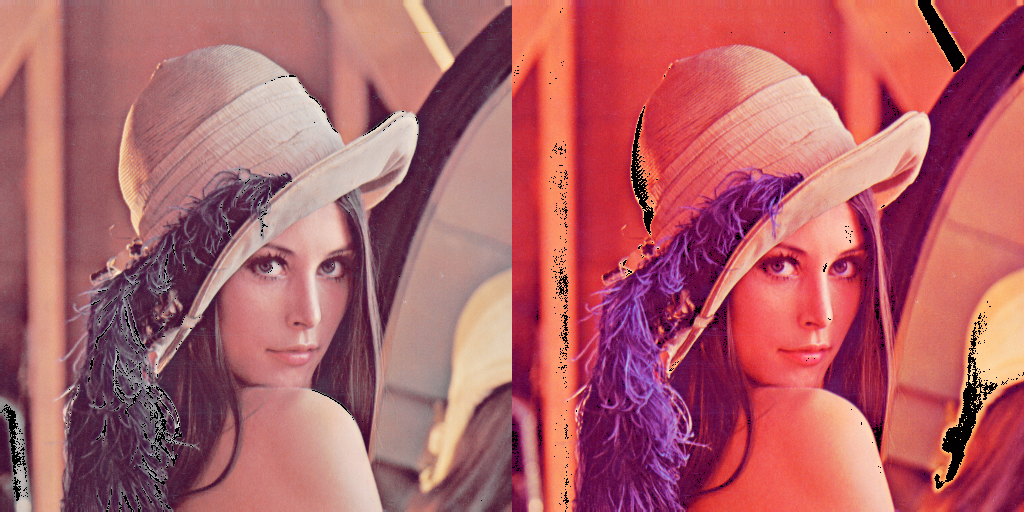

In [54]:
imgLenaHLS=cv2.cvtColor(imgLenaColor,cv2.COLOR_BGR2HLS)
# 顯示未加工前圖像
imgOrignialCombined=np.hstack((imgLenaColor,imgLenaHLS))
cv2_imshow(imgOrignialCombined)

# 影像矩陣目前的datatype
datatype=imgOrignialCombined.dtype

# 飽和度增減設定
saturedown=0.2
satureup=0.2

# 減少飽和度
# 因為都是255，所以S/255後得到的是百分比，以百分比的方式進行增減
imgLenaHLS_SatureDown=imgLenaHLS.astype('float32')
imgLenaHLS_SatureDown[:,:,-1]=imgLenaHLS_SatureDown[:,:,-1]/255-saturedown   # 飽含度(S)/255-降低百分比
imgLenaHLS_SatureDown[imgLenaHLS_SatureDown[:,:,-1]<0]=0                     # 降低飽含度後，結果如果有<0以0計
# 最後再把比例值換為0-255，type回複成int32
imgLenaHLS_SatureDown[:,:,-1]=imgLenaHLS_SatureDown[:,:,-1]*255
imgLenaHLS_SatureDown=imgLenaHLS_SatureDown.astype(datatype)

# 增加飽和度 HLS，S(飽含度)在陣列index 3
# 因為都是255，所以S/255後得到的是百分比，以百分比的方式進行增減
imgLenaHLS_SatureUp=imgLenaHLS.astype('float32')
imgLenaHLS_SatureUp[:,:,-1]=imgLenaHLS_SatureUp[:,:,-1]/255+saturedown   # 飽含度(S)/255-增加百分比
imgLenaHLS_SatureUp[imgLenaHLS_SatureUp[:,:,-1]>1]=1                     # 增加飽含度後，結果如果有>1以1計
# 最後再把比例值換為0-255，type回複成int32
imgLenaHLS_SatureUp[:,:,-1]=imgLenaHLS_SatureUp[:,:,-1]*255
imgLenaHLS_SatureUp=imgLenaHLS_SatureUp.astype(datatype)

# 兩張增減飽含度的圖轉換為BGR
imgLenaHLS_SatureDown_BGR=cv2.cvtColor(imgLenaHLS_SatureDown,cv2.COLOR_HLS2BGR)
imgLenaHLS_SatureUp_BGR=cv2.cvtColor(imgLenaHLS_SatureUp,cv2.COLOR_HLS2BGR)

# 增加/減少飽和度的兩張圖片合併後顯示
imgCombined=np.hstack((imgLenaHLS_SatureDown_BGR,imgLenaHLS_SatureUp_BGR))
cv2_imshow(imgCombined)


#直方圖均衡

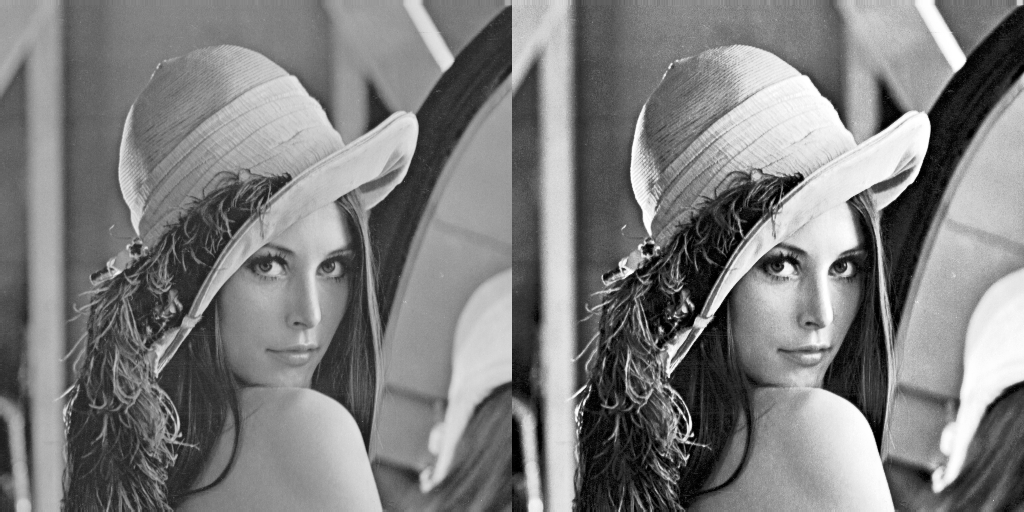

In [55]:
# 1. 使用灰階圖進行
imgLenaGray=cv2.cvtColor(imgLenaColor,cv2.COLOR_BGR2GRAY)
# 使用eqaulizeHIST出直方圖
imgLenaEQUAL=cv2.equalizeHist(imgLenaGray)
# 合併顯示
imgEQCombinedGray=np.hstack((imgLenaGray,imgLenaEQUAL))

cv2_imshow(imgEQCombinedGray)


#調整對比/明亮度

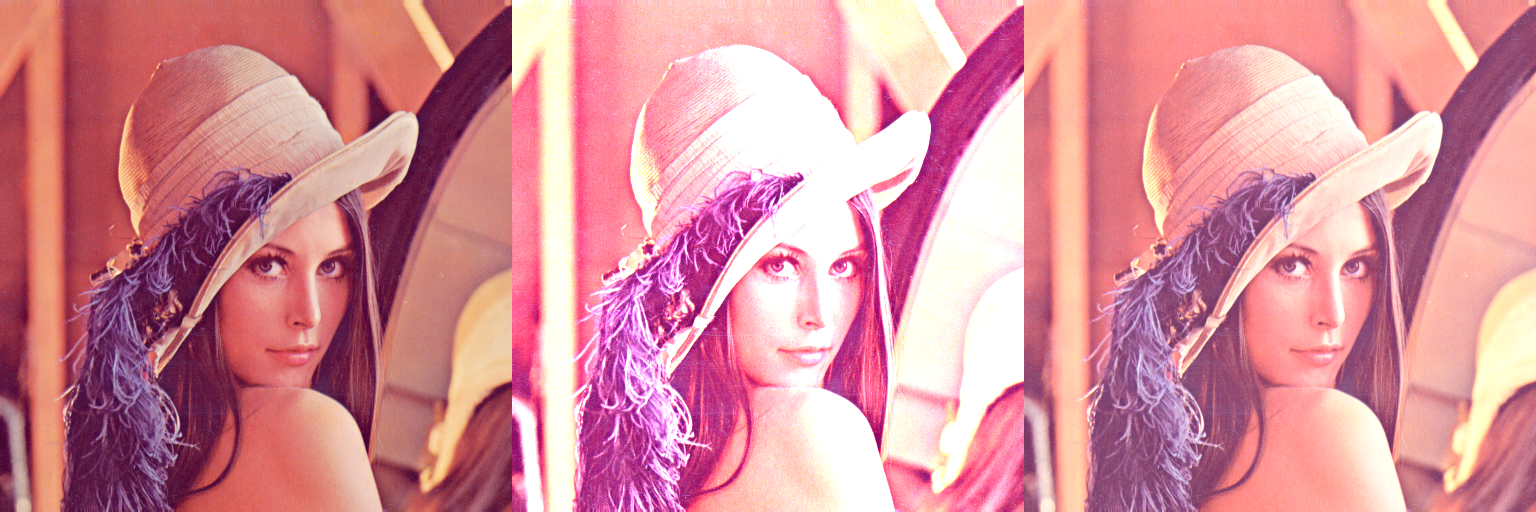

In [56]:
# alpha = 對比 (1~3)
# beta = 明亮 (1~255)
imgLenaContrast=cv2.convertScaleAbs(imgLenaColor,alpha=2,beta=0)
imgLeanaLightness=cv2.convertScaleAbs(imgLenaColor,alpha=1,beta=50)
imgLenaContrastBrightnessCombined=np.hstack((imgLenaColor,imgLenaContrast,imgLeanaLightness))

cv2_imshow(imgLenaContrastBrightnessCombined)